In [89]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

In [90]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

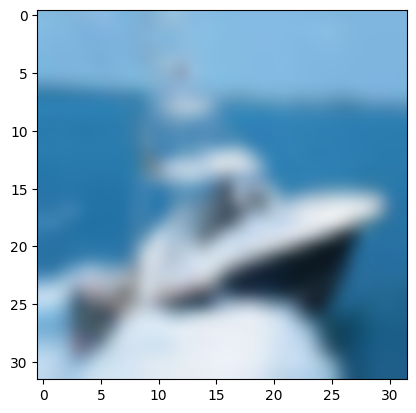

In [91]:
image = x_train[8]
plt.imshow(image, interpolation='bicubic')
plt.show()

In [92]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [93]:
x_train.shape

(50000, 32, 32, 3)

In [94]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [95]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [96]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [97]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [98]:
modelo = Sequential()

modelo.add(Conv2D(32,(3,3), padding='same', activation='relu', input_shape=(32,32,3)))
modelo.add(Conv2D(32,(3,3), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(Dropout(0.25))

modelo.add(Conv2D(64,(3,3), padding='same', activation='relu'))
modelo.add(Conv2D(64,(3,3), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(Dropout(0.25))

modelo.add(Flatten())
modelo.add(Dense(521, activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(10, activation='softmax'))

In [99]:
modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelo.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.3705 - loss: 1.7158
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.6035 - loss: 1.1189
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6662 - loss: 0.9415
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7107 - loss: 0.8207
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7403 - loss: 0.7319
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7615 - loss: 0.6805
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7830 - loss: 0.6222
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7948 - loss: 0.5841
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8072 - loss: 0.5461
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8192 - loss: 0.5095


In [100]:
previsoes = modelo.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [101]:
previsoes

array([[3.4438144e-05, 2.5042080e-05, 4.1821090e-04, ..., 7.6210400e-04,
        1.6183137e-04, 1.9811578e-05],
       [2.6778565e-05, 5.2308054e-03, 1.2820678e-12, ..., 8.4821102e-11,
        9.9471021e-01, 3.2311684e-05],
       [2.3144950e-01, 6.8876959e-02, 4.5206372e-05, ..., 1.5026229e-04,
        6.5307361e-01, 4.5774672e-02],
       ...,
       [1.3815419e-07, 2.2247455e-09, 4.3288714e-04, ..., 1.9889586e-03,
        2.2407377e-08, 2.3509573e-08],
       [9.5280511e-03, 6.5873277e-01, 4.4913955e-05, ..., 4.4765760e-04,
        5.5916314e-07, 8.6319126e-04],
       [3.4398339e-12, 2.0182916e-14, 2.1653825e-09, ..., 9.9994993e-01,
        1.5359458e-13, 3.6613104e-14]], dtype=float32)

In [102]:
previsoes_classes = np.argmax(previsoes, axis=1)
previsoes_classes

array([3, 8, 8, ..., 5, 1, 7])

In [103]:
y_test_classes = np.argmax(y_test, axis=1)

In [104]:
y_test_classes

array([3, 8, 8, ..., 5, 1, 7])

In [105]:
accuracy = accuracy_score(y_test_classes, previsoes_classes)
accuracy

0.78

In [106]:
confusion = confusion_matrix(y_test_classes, previsoes_classes)

In [107]:
confusion

array([[802,  16,  41,   9,  16,  13,   6,  12,  53,  32],
       [ 13, 909,   0,   4,   4,   6,   6,   0,  12,  46],
       [ 49,   2, 627,  49,  74, 102,  56,  26,   8,   7],
       [ 18,   4,  41, 520,  47, 249,  55,  45,   8,  13],
       [ 16,   1,  60,  41, 710,  58,  42,  58,   9,   5],
       [  7,   1,  21,  92,  27, 782,  18,  41,   2,   9],
       [  5,   4,  30,  37,  22,  47, 843,   8,   2,   2],
       [  8,   1,   5,  16,  26,  60,   6, 873,   1,   4],
       [ 43,  27,  10,  14,   3,   8,   5,   6, 870,  14],
       [ 12,  68,   2,  10,   1,   8,   9,   7,  19, 864]])